In [1]:
from roboflow import Roboflow
import matplotlib.pyplot as plt
from PIL import Image

# Add api key
rf = Roboflow(api_key="")
project = rf.workspace().project("aicook-lcv4d")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


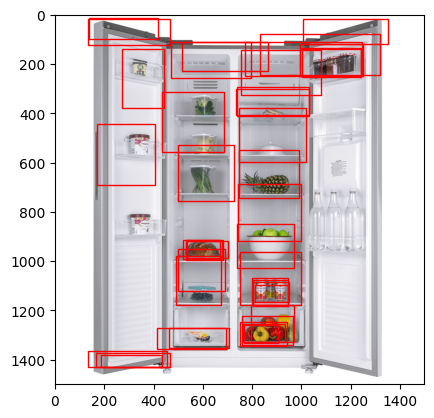

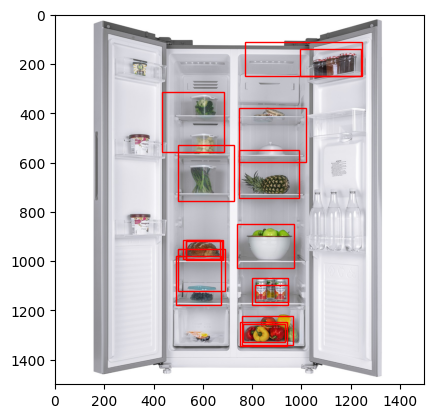

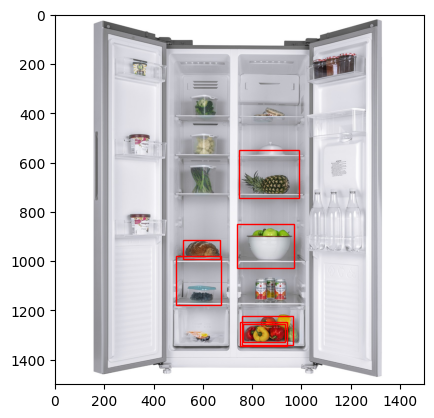

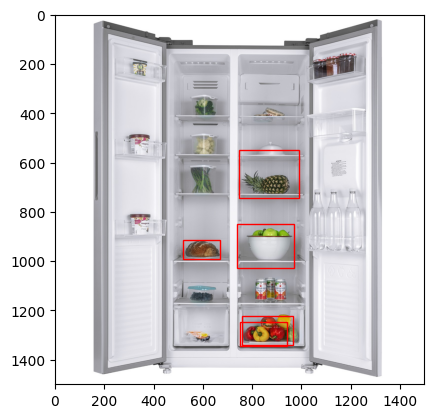

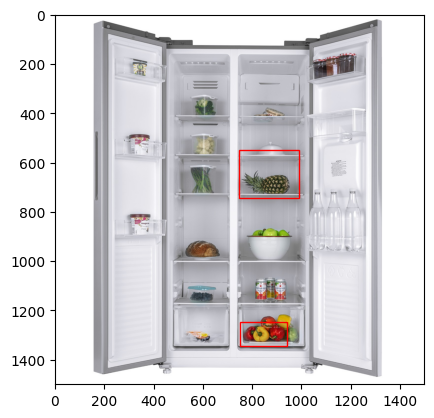

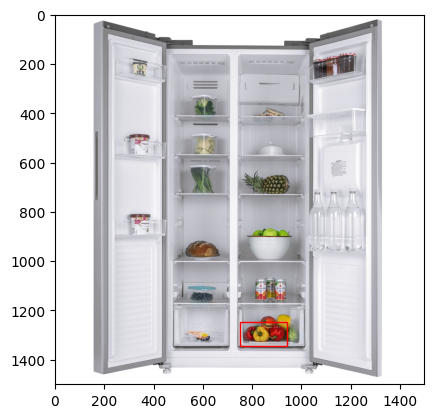

In [5]:
# visualize your prediction
for num in [0,10,20,30,40,50,60]:
    model.predict("../../data/fridge_images/kitchen_test.jpeg", confidence=num, overlap=30).plot()

In [3]:
# model.predict("test_fridges/test_1.jpg", confidence=30, overlap=30).json()

In [11]:
def crop_fridge_objects(fp, confidence):
    
    im = Image.open(fp)
    im_small = im.resize((2000,2000))
    im_small.save(f'{fp}_small.jpeg')
    
    output_json = model.predict(f'{fp}_small.jpeg', confidence=confidence, overlap=30).json()
    image_list = []
    for items in output_json['predictions']:
        image_list.append(im_small.crop((items['x'] - (items['width']/2),items['y'] - (items['height']/2),\
                                         items['x'] + (items['width']/2),items['y'] + (items['height']/2)
                                        )))
    
    return image_list

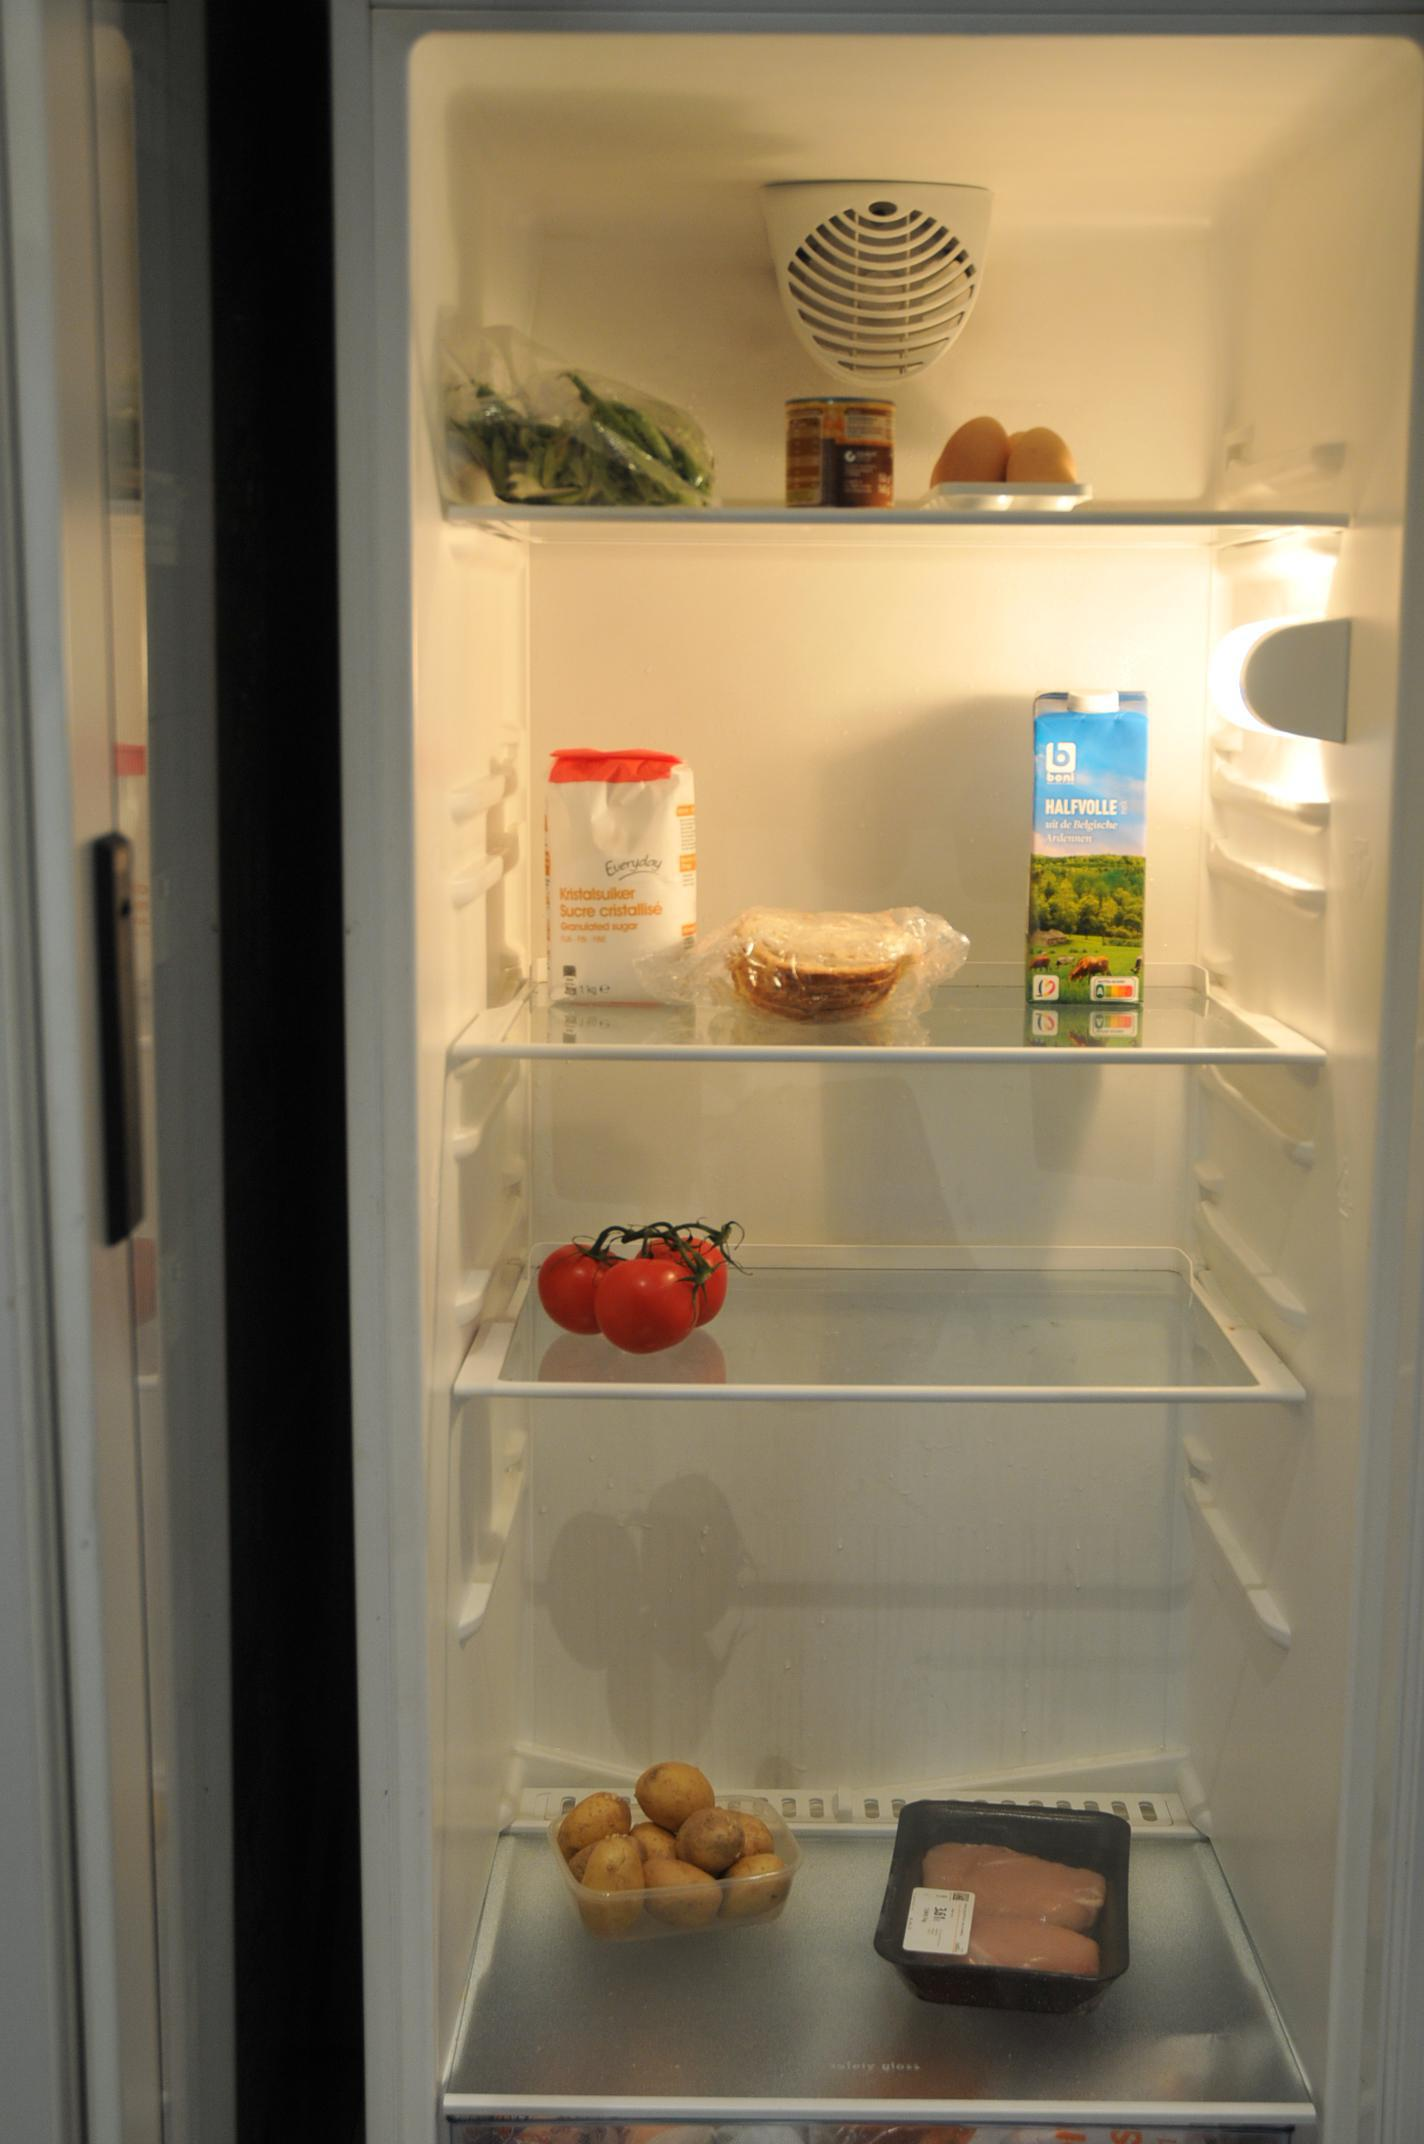

In [12]:
Image.open('../../data/fridge_images/test_fridges/test_1.jpg')

In [13]:
images = crop_fridge_objects('../../data/fridge_images/test_fridges/test_1.jpg',30)

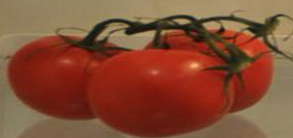

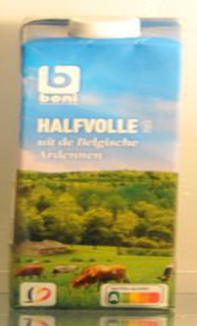

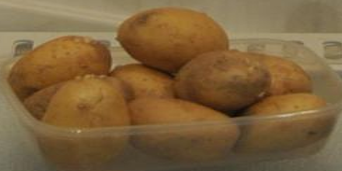

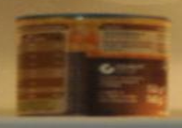

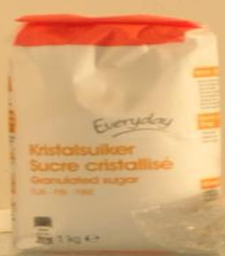

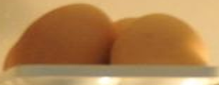

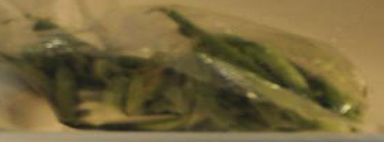

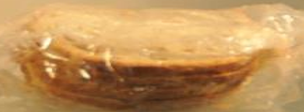

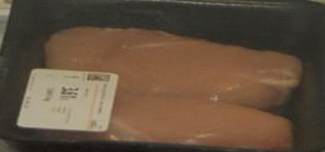

In [14]:
for image in images:
    display(image)

In [19]:
Image.open('../../data/fridge_images/test_fridges/lewagon_fridge.jpeg')

FileNotFoundError: [Errno 2] No such file or directory: 'test_fridges/lewagon_fridge.jpeg'

In [10]:
images_lw = crop_fridge_objects('test_fridges/lewagon_fridge.jpeg',30)

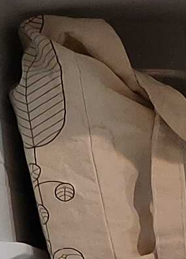

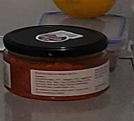

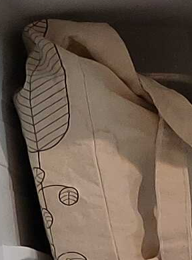

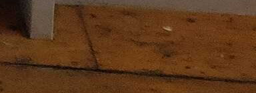

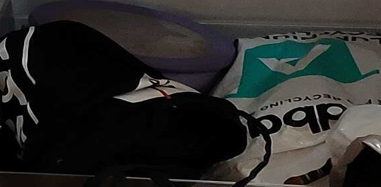

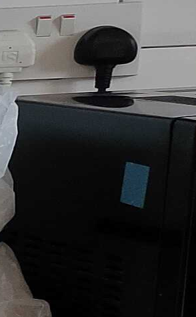

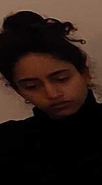

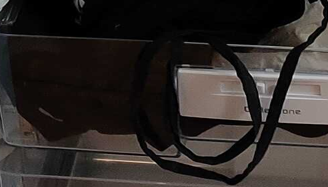

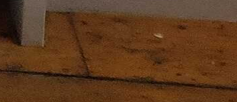

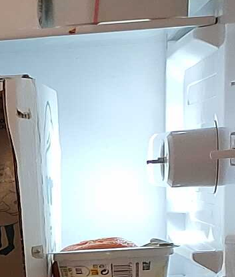

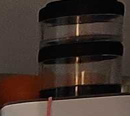

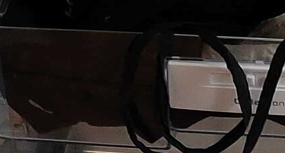

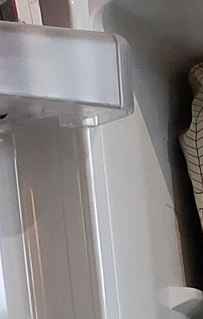

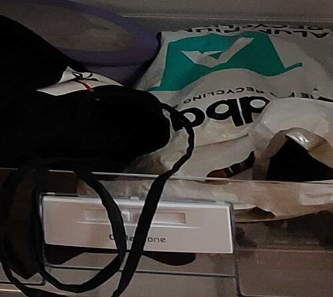

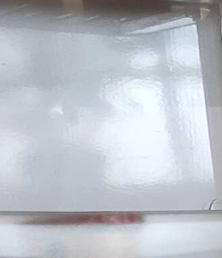

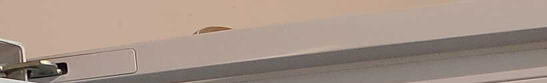

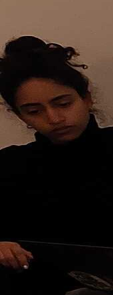

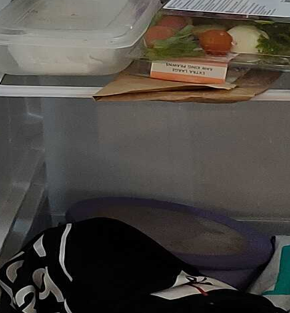

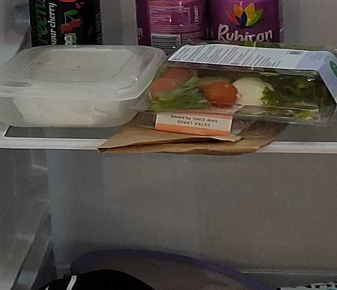

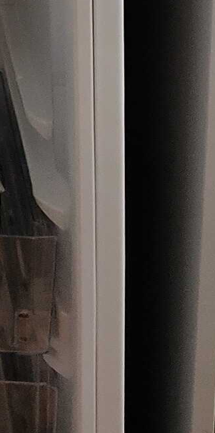

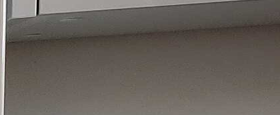

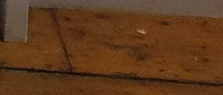

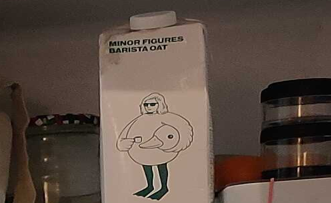

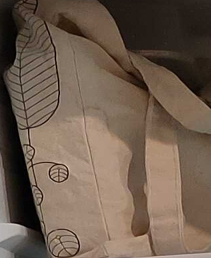

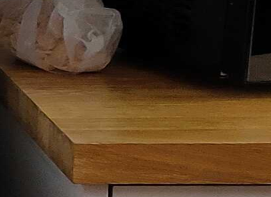

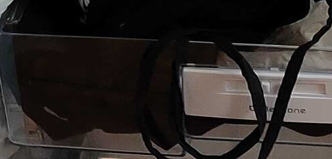

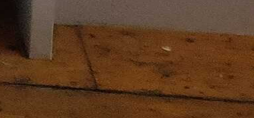

In [11]:
for image in images_lw:
    display(image)